# Problem Statement

## Business Context

Coffee roasting is the process of turning green coffee beans into brown ones. Brown coffee beans can be made in a variety of methods, which also influences the flavor of the end product. A roasting instrument is basically a convection oven. It is a mechanism of inflicting heat energy into the raw product which makes the product consumable. And the price of coffee is heavily influenced by the quality of the beans after roasting. As a result, the cost can be determined depending on the quality of the beans after roasting.

The rising automation in the manufacturing business necessitates the automation of quality inspection of output products with minimal human intervention. Quality inspectors in businesses examine product quality after it is manufactured to ensure that it meets industry standards. 

Each product's quality inspection is a time-consuming manual process, and a low-quality product wastes upstream factory capacity, consumables, labor, and money. With the emerging AI trend, companies are looking to leverage machine learning-based technologies to automate material quality inspection during the manufacturing process to reduce human intervention while achieving human-level or better accuracy.



## Objective

A roasting corporation named "KC Roasters" has engaged you to predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans. The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best. The higher the quality of the beans, the higher the price.

The coffee roasting instrument used by Roasters is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber. Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided.

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.


## Data Dictionary
- T_data_1_1 - Temperature recorded by 1st sensor in the 1st chamber in Fahrenheit
- T_data_1_2 - Temperature recorded by 2nd sensor in the 1st chamber in Fahrenheit
- T_data_1_3 - Temperature recorded by 3rd sensor in the 1st chamber in Fahrenheit
- T_data_2_1 - Temperature recorded by 1st sensor in the 2nd chamber in Fahrenheit
- T_data_2_2 - Temperature recorded by 2nd sensor in the 2nd chamber in Fahrenheit
- T_data_2_3 - Temperature recorded by 3rd sensor in the 2nd chamber in Fahrenheit
- T_data_3_1 - Temperature recorded by 1st sensor in the 3rd chamber in Fahrenheit
- T_data_3_2 - Temperature recorded by 2nd sensor in the 3rd chamber in Fahrenheit
- T_data_3_3 - Temperature recorded by 3rd sensor in the 3rd chamber in Fahrenheit
- T_data_4_1 - Temperature recorded by 1st sensor in the 4th chamber in Fahrenheit
- T_data_4_2 - Temperature recorded by 2nd sensor in the 4th chamber in Fahrenheit
- T_data_4_3 - Temperature recorded by 3rd sensor in the 4th chamber in Fahrenheit
- T_data_5_1 - Temperature recorded by 1st sensor in the 5th chamber in Fahrenheit
- T_data_5_2 - Temperature recorded by 2nd sensor in the 5th chamber in Fahrenheit
- T_data_5_3 - Temperature recorded by 3rd sensor in the 5th chamber in Fahrenheit
- H_data - Height of Raw material layer, basically represents the volume of raw material going inside the chamber in pounds.
- AH_data - Roasted Coffee beans relative humidity.
- quality -  Quality of the beans 

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor


# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [2]:
kc_roasters_data = pd.read_csv("/kaggle/input/kc-roasters-dataset/Roasters.csv")

## Data Overview

The initial steps to get an overview of any dataset are to:
- observe the first few rows of the dataset to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [3]:
# Check the number of rows and columns in the data
kc_roasters_data.shape

(29131, 18)

* The training dataset has 29131 rows and 18 columns 

### Displaying the first few rows of the dataset

In [4]:
# Peeking into the data
kc_roasters_data.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.850,9.220,61
1,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.510,9.220,57
2,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.990,9.220,61
3,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.340,9.220,63
4,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.040,9.220,63


In [5]:
# Checking last few rows
kc_roasters_data.tail()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
29126,275,276,266,180,376,356,495,506,486,341,337,308,234,220,223,154.120,6.190,77
29127,275,276,266,181,376,355,495,507,486,341,337,308,234,220,224,158.790,6.190,82
29128,275,276,266,183,376,354,495,507,486,341,337,307,234,219,224,154.830,6.190,82
29129,275,276,265,185,376,354,495,507,486,341,337,307,234,219,224,153.680,6.190,82
29130,274,276,265,187,376,353,496,508,486,341,337,307,234,219,224,155.640,6.190,82


### Checking for duplicate values

In [6]:

kc_roasters_data.duplicated().sum()

0

- The data has no duplicate rows.

### Checking for missing values

In [7]:
# Checking missing values in the data
round(kc_roasters_data.isnull().sum() / kc_roasters_data.isnull().count() * 100, 2)

T_data_1_1   0.000
T_data_1_2   0.000
T_data_1_3   0.000
T_data_2_1   0.000
T_data_2_2   0.000
T_data_2_3   0.000
T_data_3_1   0.000
T_data_3_2   0.000
T_data_3_3   0.000
T_data_4_1   0.000
T_data_4_2   0.000
T_data_4_3   0.000
T_data_5_1   0.000
T_data_5_2   0.000
T_data_5_3   0.000
H_data       0.150
AH_data      0.110
quality      0.000
dtype: float64

- There are missing values in AH_data and H_data variables. We will impute them later with Median.

### Checking the data types of the columns for the dataset

In [8]:
# Checking datatypes
kc_roasters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


- Int type variables - 16
- float type variables - 2
- categorical variables - 0

### Statistical summary of the dataset

In [9]:
# Statistical summary 
kc_roasters_data.describe().T

,count,mean,std,min,25%,50%,75%,max
T_data_1_1,29131.000,253.552,32.488,13.000,232.000,252.000,280.000,343.000
T_data_1_2,29131.000,254.078,30.025,168.000,231.000,254.000,280.000,341.000
T_data_1_3,29131.000,254.058,28.977,183.000,232.000,252.000,279.000,339.000
T_data_2_1,29131.000,343.076,32.544,70.000,325.000,344.000,363.000,436.000
T_data_2_2,29131.000,344.524,33.719,113.000,326.000,344.000,364.000,598.000
T_data_2_3,29131.000,342.017,31.031,107.000,322.500,343.000,363.000,433.000
T_data_3_1,29131.000,494.513,50.315,311.000,461.000,497.000,524.000,1024.000
T_data_3_2,29131.000,495.851,43.756,401.000,460.000,498.000,527.000,756.000
T_data_3_3,29131.000,500.775,64.996,197.000,460.000,499.000,530.000,934.000
T_data_4_1,29131.000,345.081,43.405,53.000,324.000,343.000,362.000,912.000


### Analysis Notes
* Standard deviations for all temperature-related variables exhibit comparable values, indicating a relatively uniform degree of temperature fluctuation across the dataset.
* Notably, the minimum recorded temperature for the first sensor in Chamber 1 was 13, contrasting sharply with minimums of 168 and 183 for the second and third sensors in the same chamber.
* This significant within-chamber temperature disparity is also evident with the first sensor of Chamber 2 and warrants further investigation due to its apparent unlikelihood.

In [10]:
# Data Copy
kc_roasters_data_copy = kc_roasters_data.copy()

## Exploratory Data Analysis

### Univariate analysis

In [11]:
# histogram and boxplot function


def histogram_boxplot_function(kc_roasters_data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # X-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=kc_roasters_data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=kc_roasters_data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=kc_roasters_data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        kc_roasters_data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        kc_roasters_data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

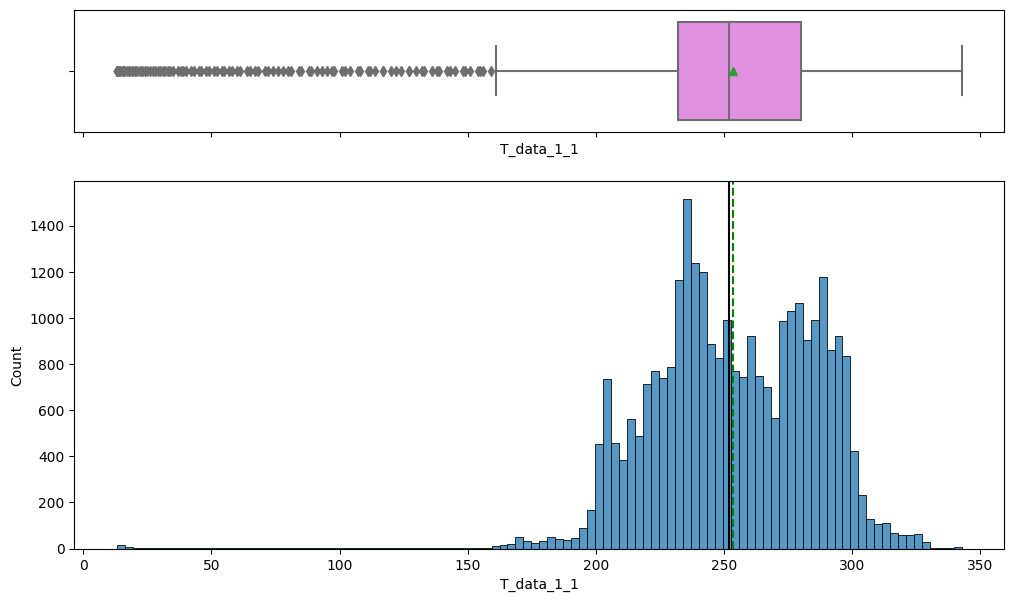

In [12]:
# Checking T_data_1_1
histogram_boxplot_function(kc_roasters_data_copy, "T_data_1_1", figsize=(12, 7), kde=False, bins=None)

#### Observations
* The distribution of `T_data_1_1` appears to be bimodal.
* There are numerous outliers on the lower end of the `T_data_1_1` distribution. Let's examine the distributions for `T_data_1_2` and `T_data_1_3` for comparison.

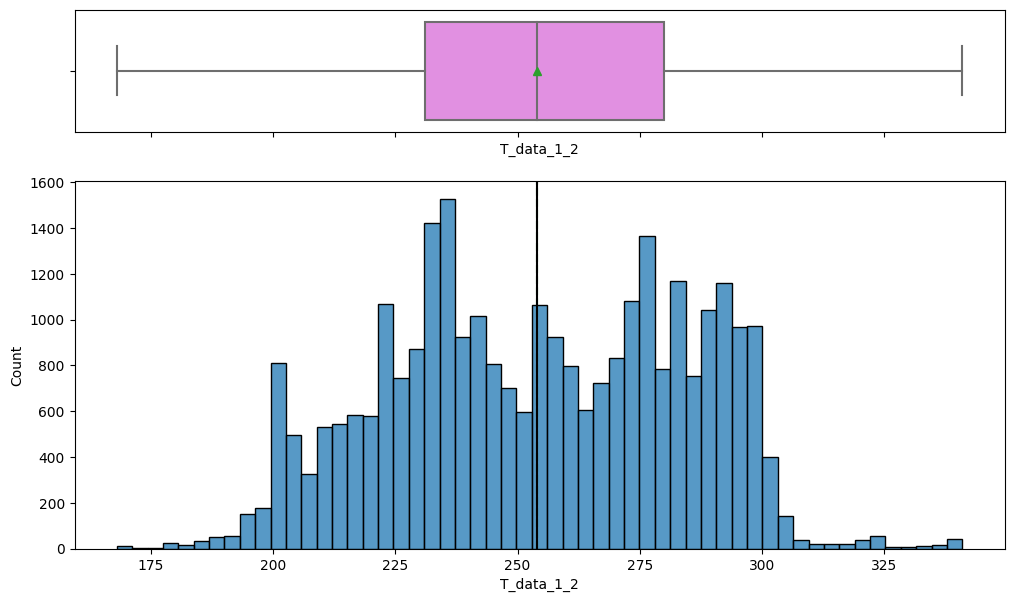

In [13]:
# Checking T_data_1_2
histogram_boxplot_function(kc_roasters_data_copy, "T_data_1_2", figsize=(12, 7), kde=False, bins=None)

* No outliers were detected in this variable's data.

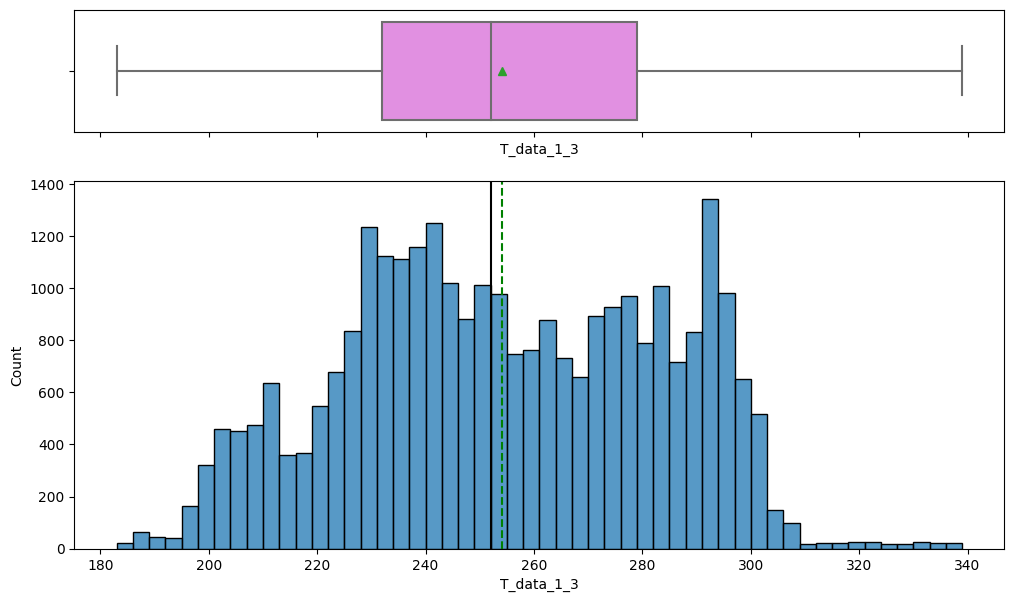

In [14]:
# Checking T_data_1_3
histogram_boxplot_function(kc_roasters_data_copy, "T_data_1_3", figsize=(12, 7), kde=False, bins=None)

* No outliers were detected in this variable's data.

#### Handling Anomalous Data in T_data_1_1

Given that the data distributions for `T_data_1_2` and `T_data_1_3` within Chamber 1 do not exhibit the low outliers present in `T_data_1_1`, we infer that these low readings from the first sensor may be inaccurate. As a corrective measure, we will cap the lower tail of the `T_data_1_1` distribution. Values falling below the minimum recorded value across `T_data_1_2` and `T_data_1_3` will be set equal to this combined minimum.

In [15]:
# Applying Cap to T_data_1_1
# Using the minimums of sensors 2 (168) and 3 (183) in Chamber 1 as a reference,
# we will cap values in T_data_1_1 that are less than 168, setting them to 168.
kc_roasters_data_copy["T_data_1_1"].clip(lower=168, inplace=True)

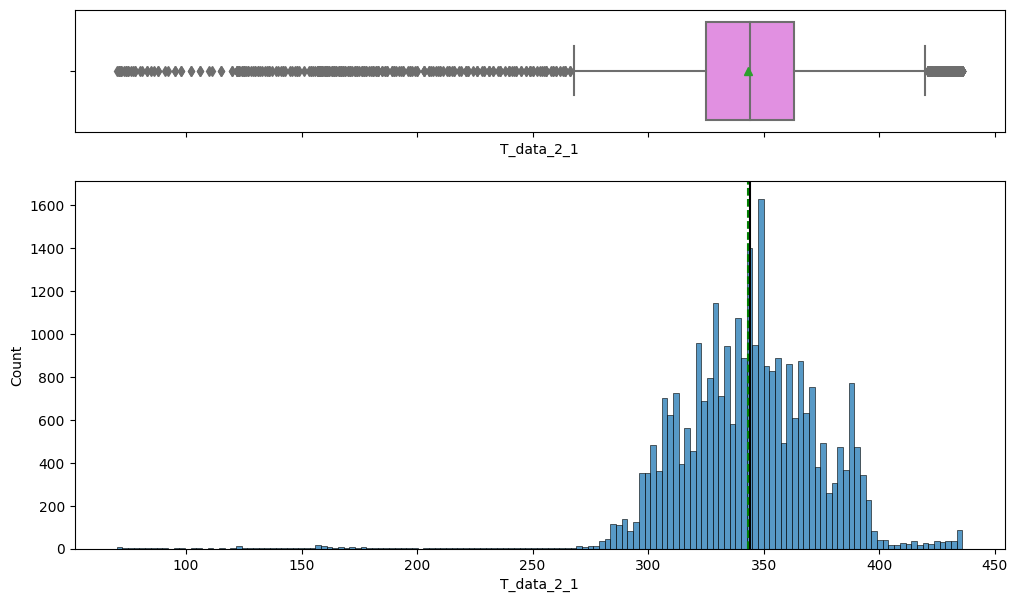

In [16]:
# Checking T_data_2_1
histogram_boxplot_function(kc_roasters_data_copy, "T_data_2_1", figsize=(12, 7), kde=False, bins=None)

#### Observations on T_data_2_1

* The distribution of `T_data_2_1` appears approximately normal but exhibits a slight left skew.
* Several outliers are present on the lower (left) side of the distribution. Let's investigate the distributions of `T_data_2_2` and `T_data_2_3` in the same chamber for comparison.

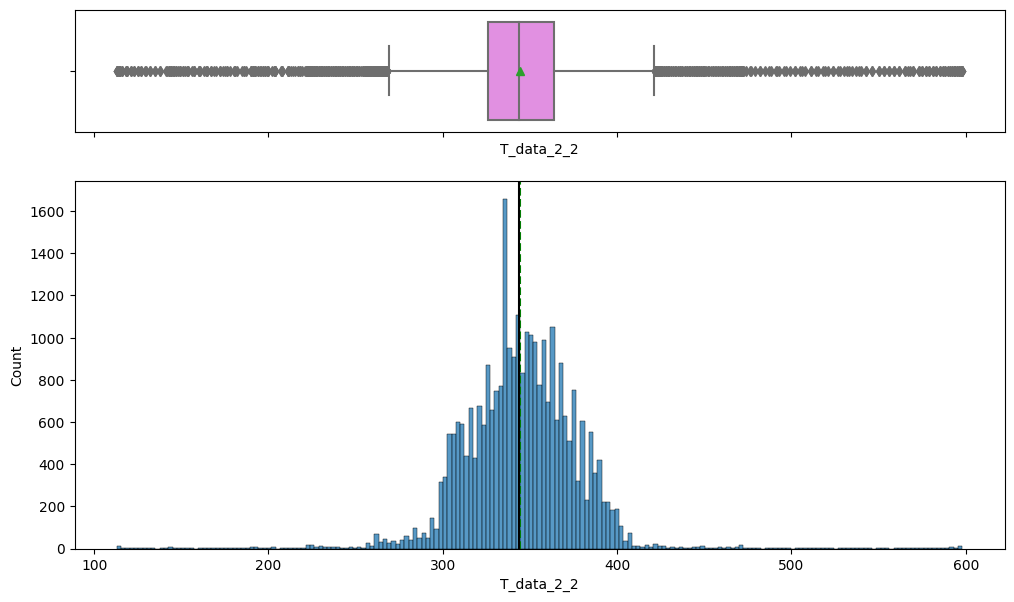

In [17]:
# Checking T_data_2_2
histogram_boxplot_function(kc_roasters_data_copy, "T_data_2_2", figsize=(12, 7), kde=False, bins=None)

* This variable exhibits an approximately normal distribution.

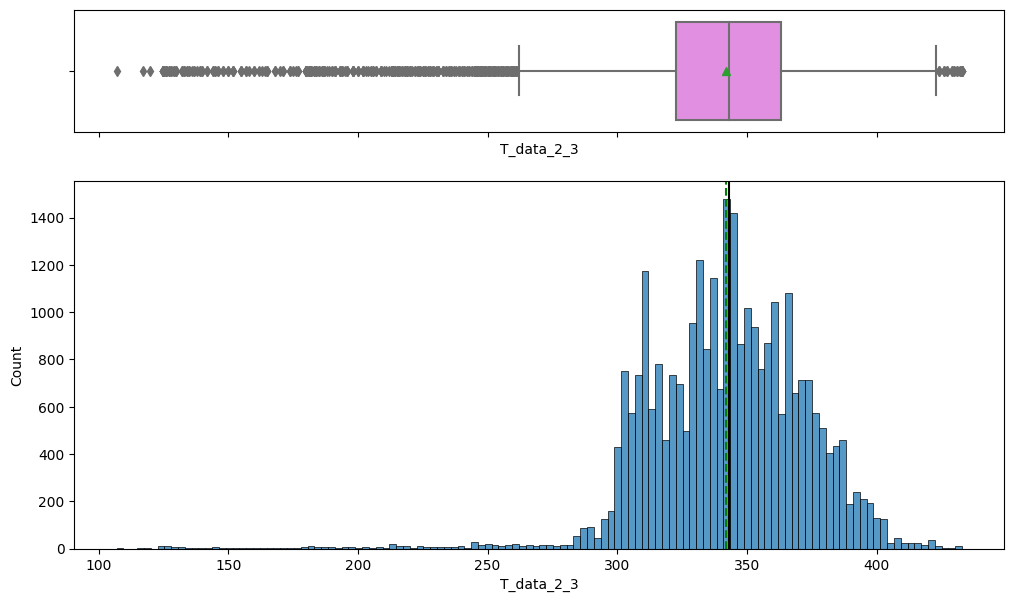

In [18]:
# Checking T_data_2_3
histogram_boxplot_function(kc_roasters_data_copy, "T_data_2_3", figsize=(12, 7), kde=False, bins=None)

* The distribution of the variable is approximately normal with a slight left skew.

#### Data Cleaning for T_data_2_1 Based on Sensor Comparisons
Observations of `T_data_2_2` and `T_data_2_3` indicate the presence of outliers, yet their data does not drop below 100 (or reference another relevant lower bound). To address the lower-end anomalies in `T_data_2_1` while respecting the range seen in the other sensors in the same chamber, we will apply a floor to the `T_data_2_1` values. Values below the minimum recorded value across both `T_data_2_2` and `T_data_2_3` will be set to this minimum.

In [19]:
# Capping T_data_2_1 based on minimums from T_data_2_2 (113) and T_data_2_3 (107).
# Replace values in T_data_2_1 less than 168 with 107.
kc_roasters_data_copy["T_data_2_1"].clip(lower=107, inplace=True)

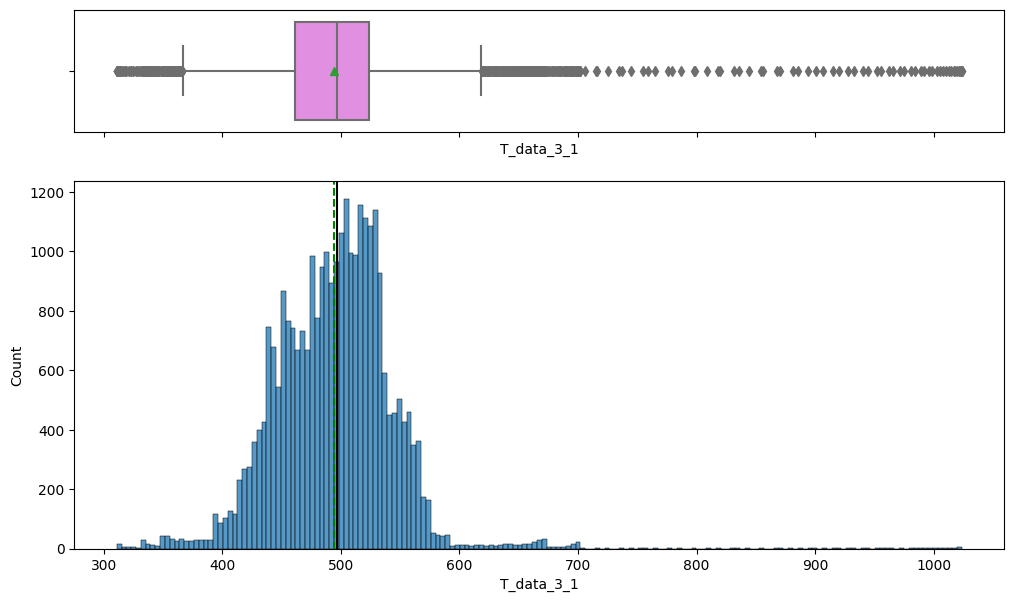

In [20]:
# Checking T_data_3_1
histogram_boxplot_function(kc_roasters_data_copy, "T_data_3_1", figsize=(12, 7), kde=False, bins=None)

* The distribution of the variable is approximately normal with a slight right skew.

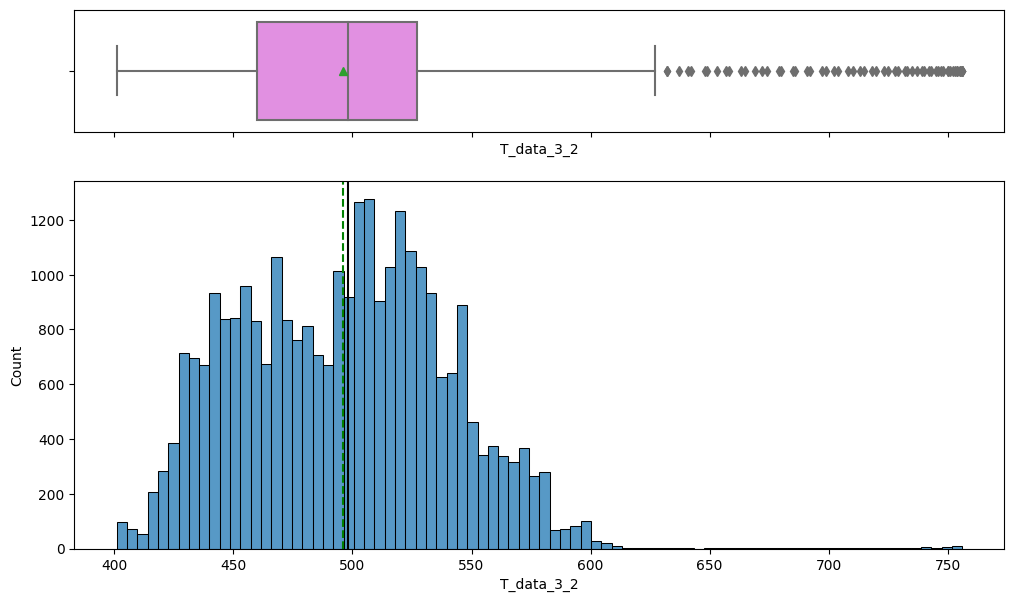

In [21]:
# Check T_data_3_2
histogram_boxplot_function(kc_roasters_data_copy, "T_data_3_2", figsize=(12, 7), kde=False, bins=None)

- The variable is approximately uniformly distributed with slight left skew.

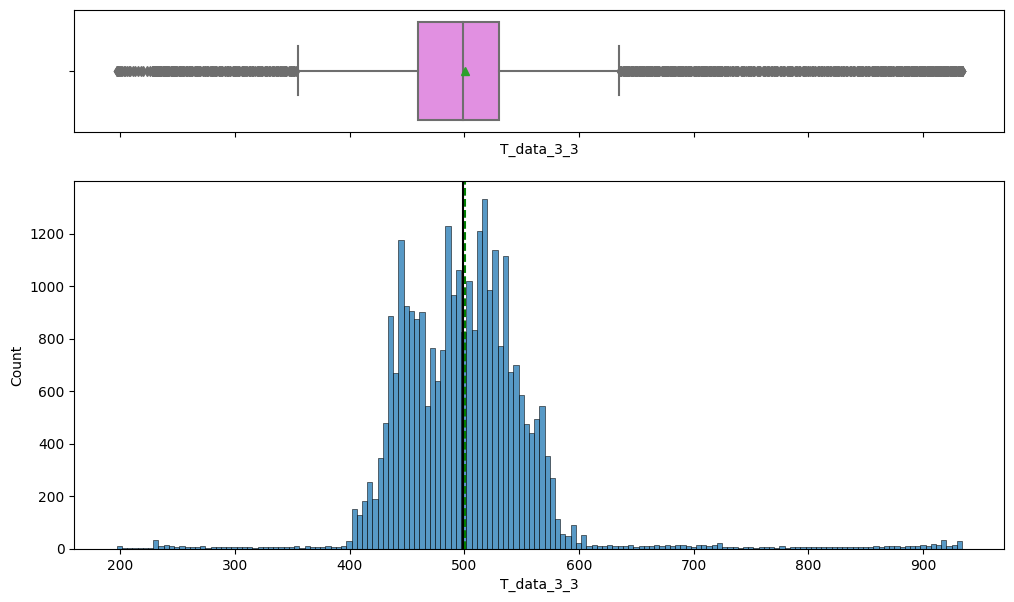

In [22]:
# Check T_data_3_3
histogram_boxplot_function(kc_roasters_data_copy, "T_data_3_3", figsize=(12, 7), kde=False, bins=None)

* The distribution of the variable is multi-modal (has many peaks) and shows outliers on both the lower and upper ends.

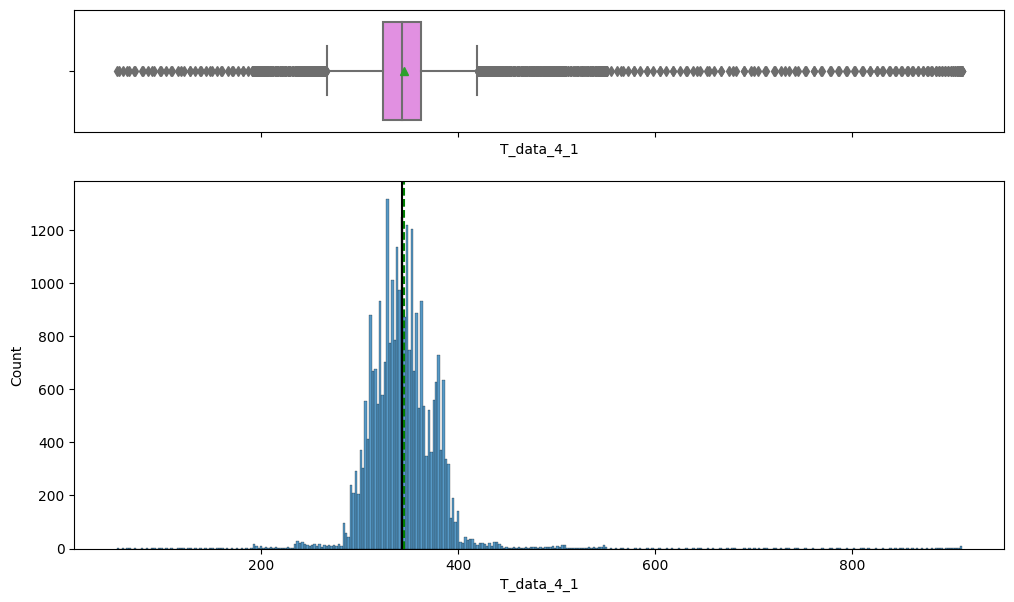

In [23]:
# Check T_data_4_1
histogram_boxplot_function(kc_roasters_data_copy, "T_data_4_1", figsize=(12, 7), kde=False, bins=None)

* The distribution of the variable is approximately normal but includes outliers on both sides.

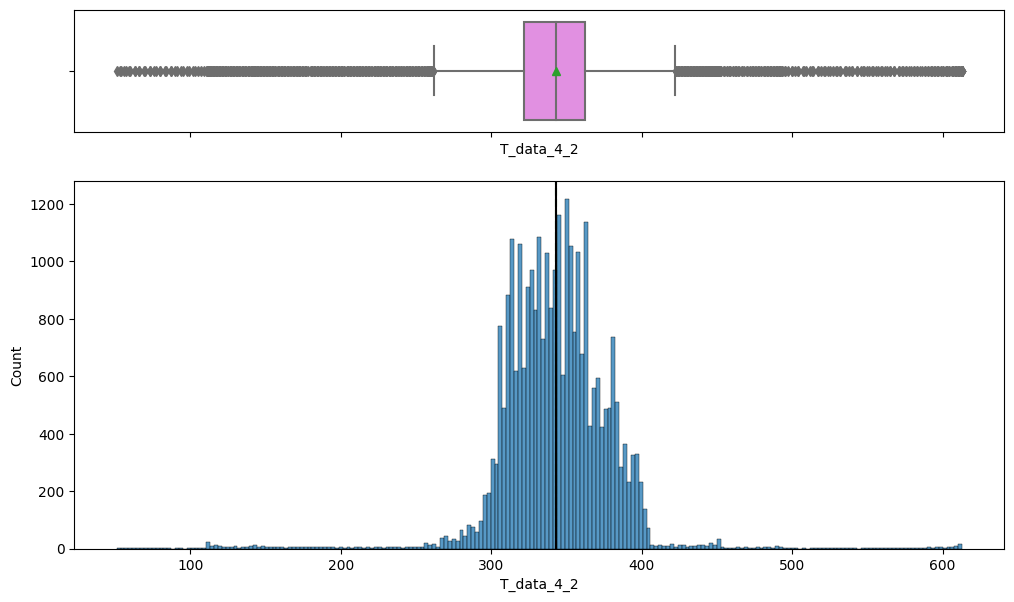

In [24]:
# Check T_data_4_2
histogram_boxplot_function(kc_roasters_data_copy, "T_data_4_2", figsize=(12, 7), kde=False, bins=None)

* The variable contains many outliers on both the lower and upper ends. Most of the data values fall within the range of 250 to 400.

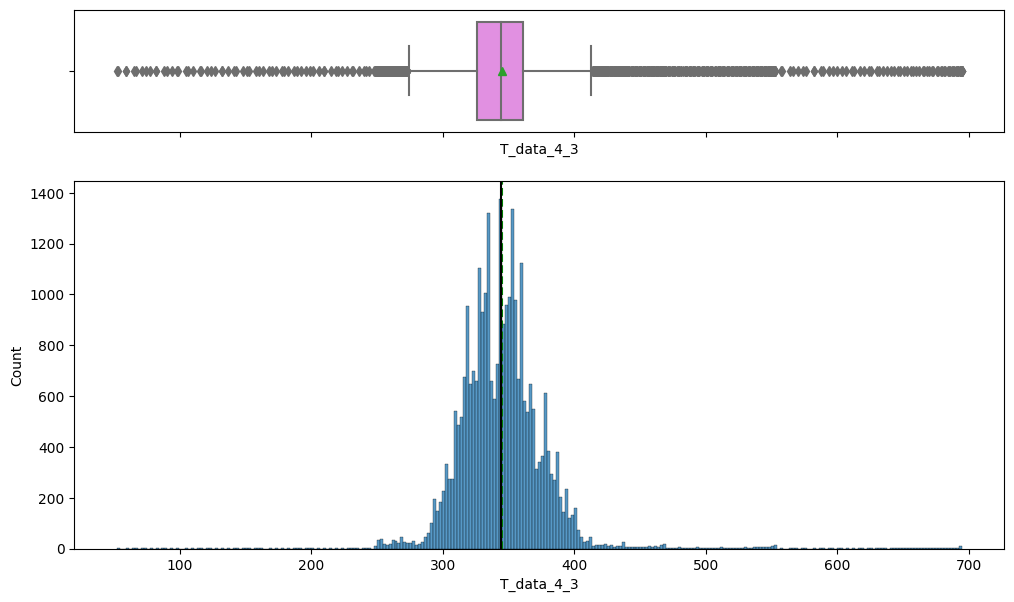

In [25]:
# Check T_data_4_3
histogram_boxplot_function(kc_roasters_data_copy, "T_data_4_3", figsize=(12, 7), kde=False, bins=None)

* Based on the box plot, numerous outliers are evident on both sides of the whiskers. The majority of the data points for this variable are concentrated between approximately 250 and 400.

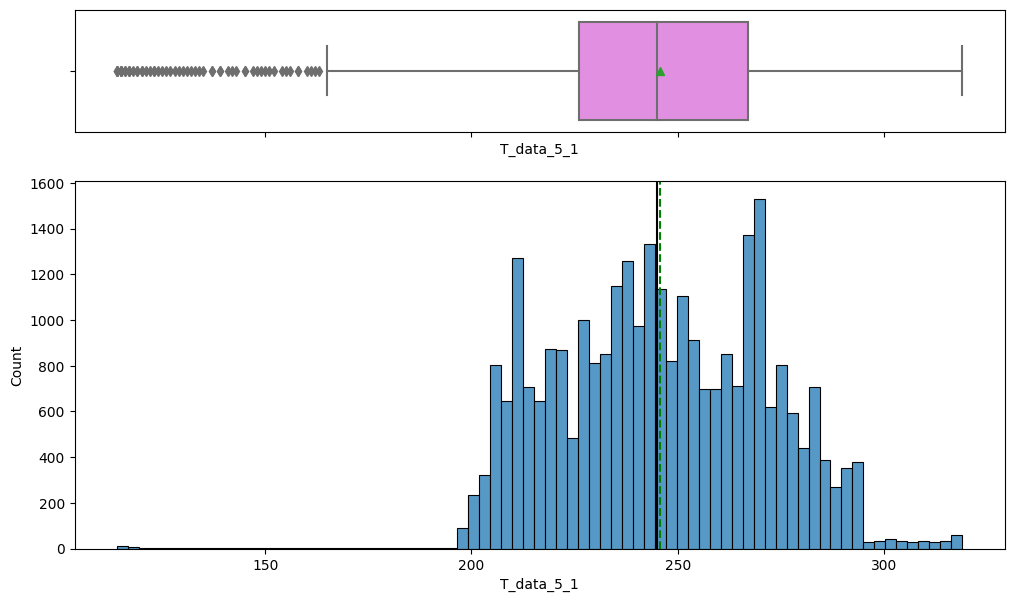

In [26]:
# Check T_data_5_1
histogram_boxplot_function(kc_roasters_data_copy, "T_data_5_1", figsize=(12, 7), kde=False, bins=None)

* Based on the box plot, numerous outliers are evident only on the left side of the whiskers. The majority of the data points for the variable are concentrated between approximately 250 and 300.

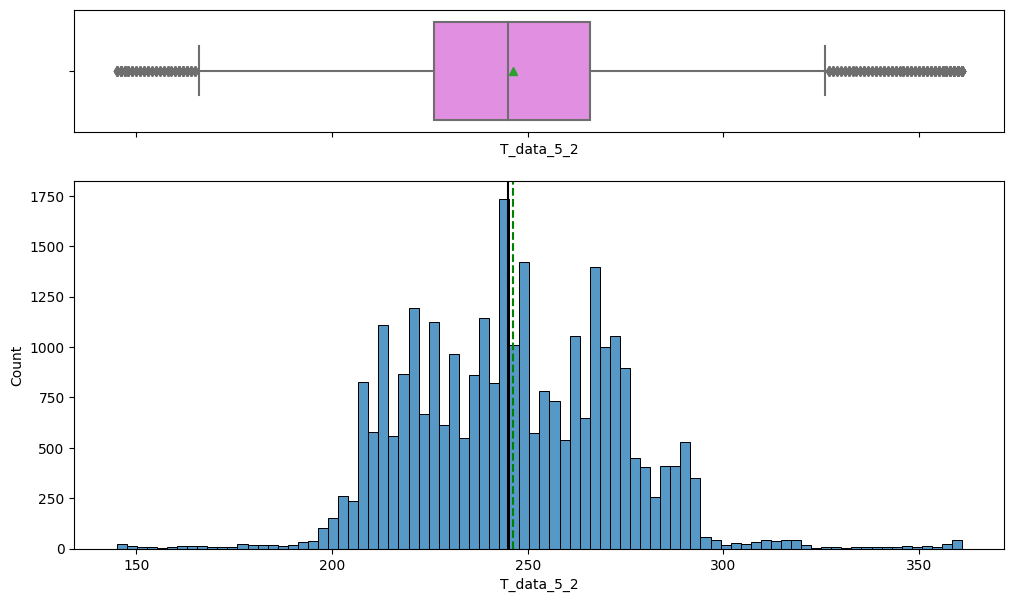

In [27]:
# Check T_data_5_2
histogram_boxplot_function(kc_roasters_data_copy, "T_data_5_2", figsize=(12, 7), kde=False, bins=None)

* Based on the box plot, numerous outliers are evident on both sides of the whiskers. The majority of the data points for the variable are concentrated between approximately 200 and 300.

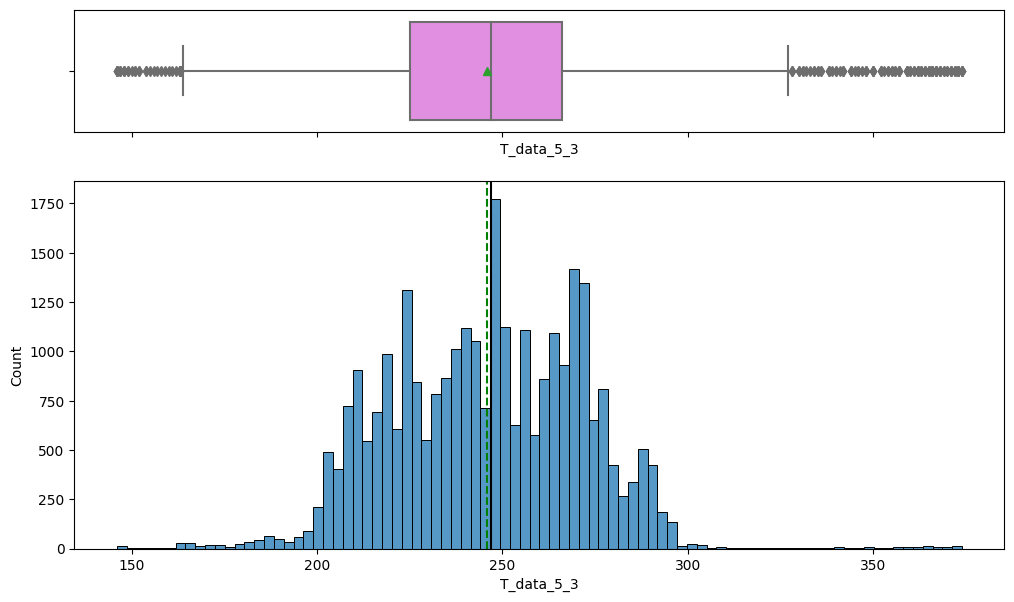

In [28]:
# Check T_data_5_3
histogram_boxplot_function(kc_roasters_data_copy, "T_data_5_3", figsize=(12, 7), kde=False, bins=None)

#### Key Observations

* The variable's distribution appears approximately normal, although outliers are present on both sides of the box plot's whiskers.
* We observed notable variation in temperature readings among the three sensors within the same chamber. This discrepancy could potentially be attributed to the large size of the chamber resulting in uneven heat distribution.

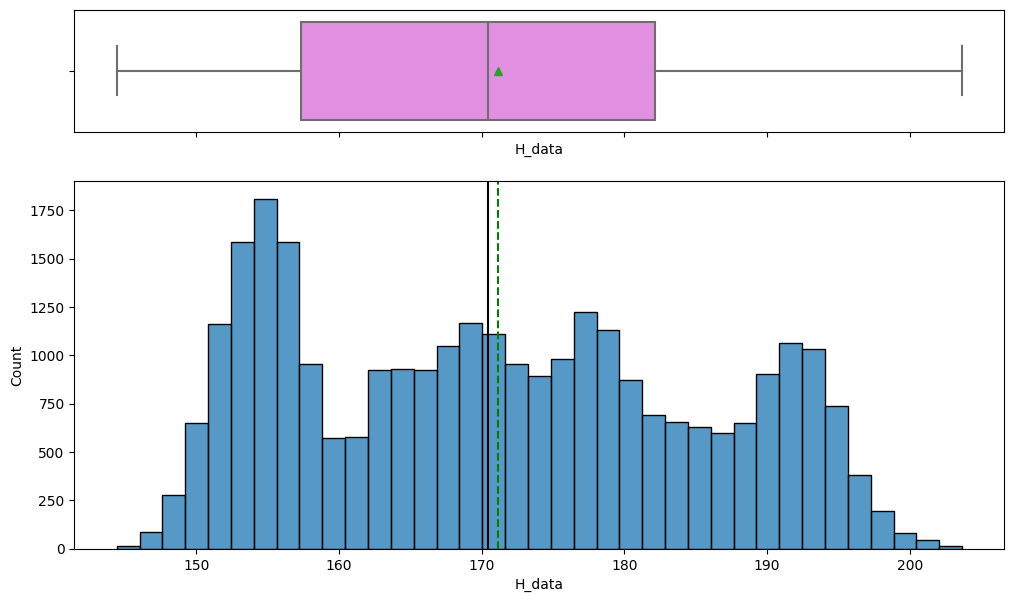

In [29]:
# Check H_data
histogram_boxplot_function(kc_roasters_data_copy, "H_data", figsize=(12, 7), kde=False, bins=None)

* The majority of the values for the variable fall between approximately 150 and 200.

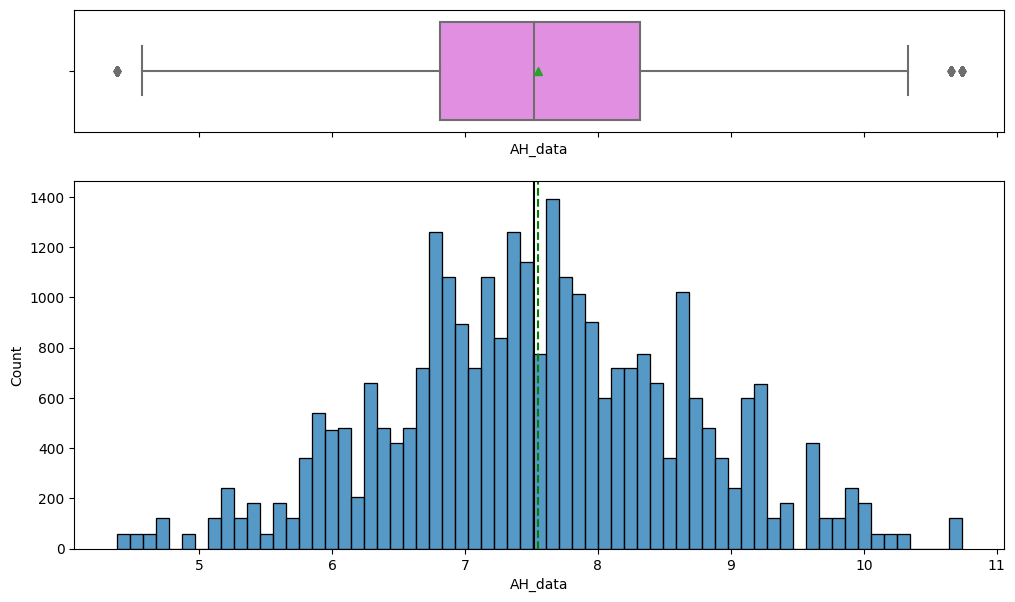

In [30]:
# Check AH_data
histogram_boxplot_function(kc_roasters_data_copy, "AH_data", figsize=(12, 7), kde=False, bins=None)

* There are only a few outliers outside the whiskers, and the overall distribution of the variable appears to follow a normal pattern.

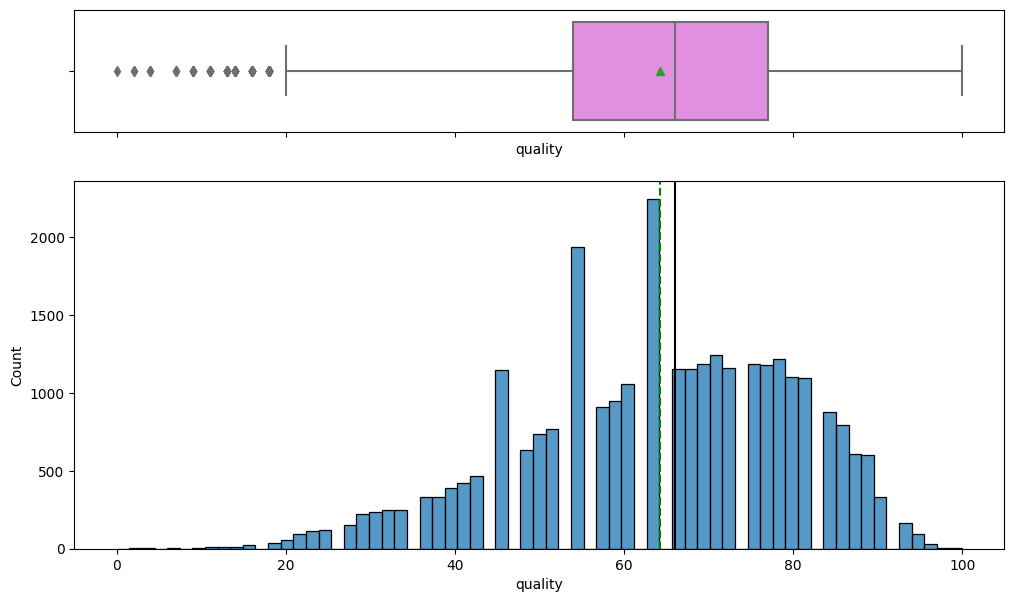

In [31]:
# Check quality
histogram_boxplot_function(kc_roasters_data_copy, "quality", figsize=(12, 7), kde=False, bins=None)

#### Observations on the quality Variable

* The variable's distribution is left-skewed.
* Based on domain knowledge (or previous analysis), the typical quality of a product, represented by this variable, usually falls within the range of 20 to 100.

### Bivariate analysis

<Axes: xlabel='quality', ylabel='AH_data'>

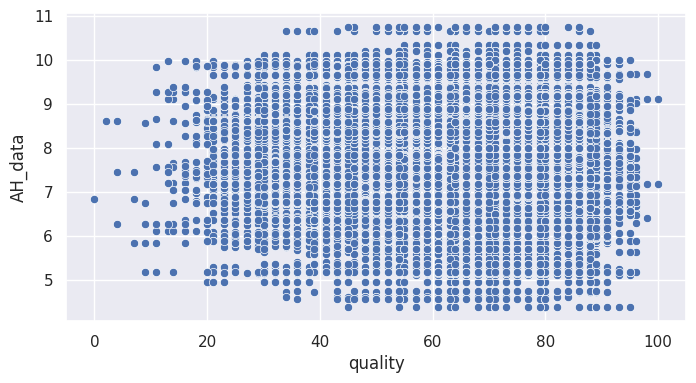

In [32]:
sns.set(rc={"figure.figsize": (8, 4)})

# Quality vs AH_data
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="AH_data")

#### Observations on Humidity (AH_data)
* The majority of observations for `AH_data` (humidity) are concentrated between values of 5 and 10.
* There doesn't appear to be a discernible pattern or relationship between product quality and `AH_data`.

<Axes: xlabel='quality', ylabel='H_data'>

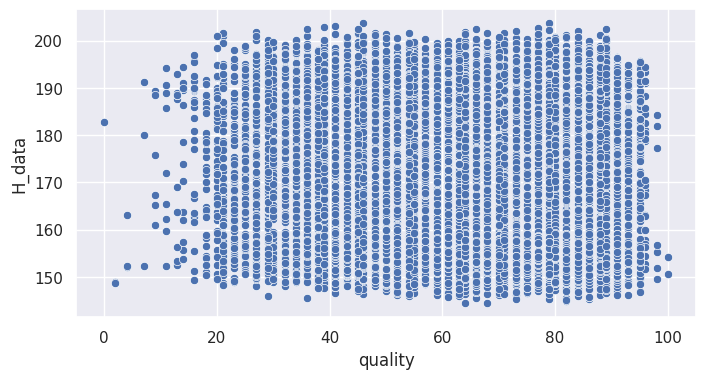

In [33]:
# Quality vs H_data
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="H_data")

#### Observations on Volume Flow and Quality
* It appears that the volume entering the chamber does not have a significant impact on product quality.
* This lack of impact could be because the typical volume range (150 to 200) is within an acceptable or optimal operating window.

<Axes: xlabel='quality', ylabel='T_data_1_3'>

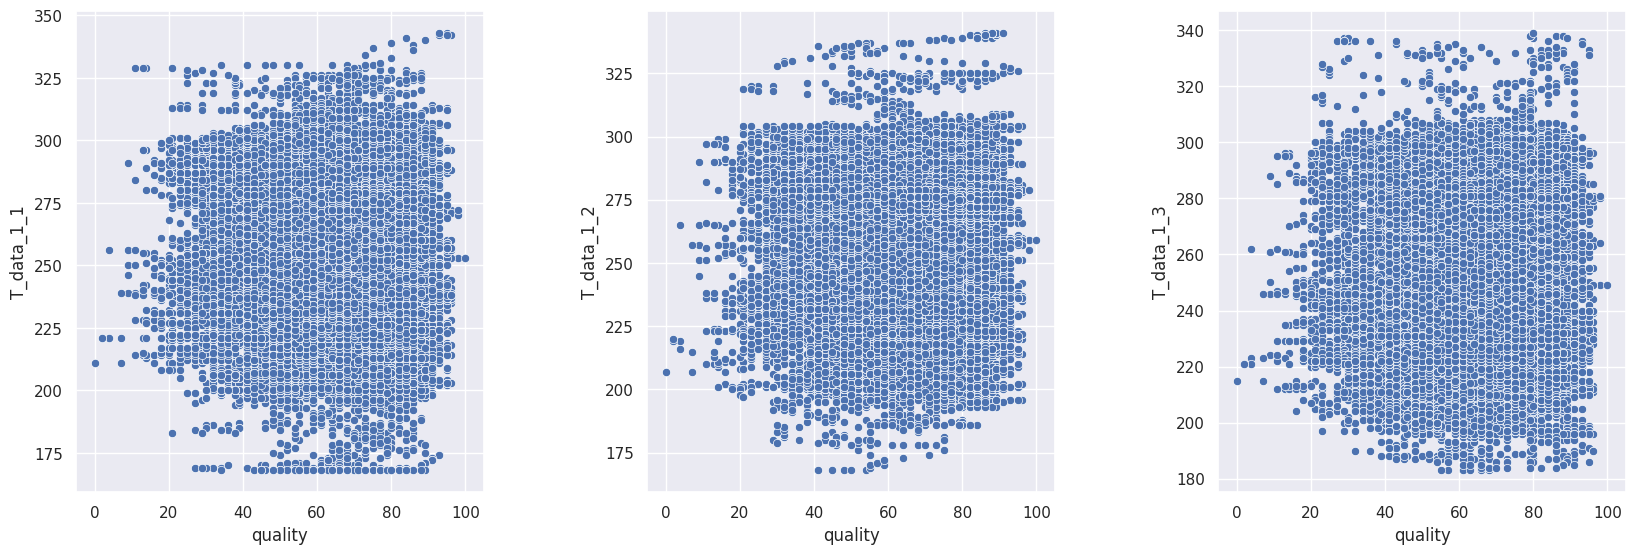

In [34]:
# quality vs temp in 1st chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_1_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_1_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_1_3")
   


#### Observations on First Chamber Temperature and Quality
* The temperature within the first chamber (`T_data_1_x`) does not appear to have a significant or severe effect on the quality outcome.
* Temperatures in the first chamber are typically found to be between approximately 150 and 300.

<Axes: xlabel='quality', ylabel='T_data_2_3'>

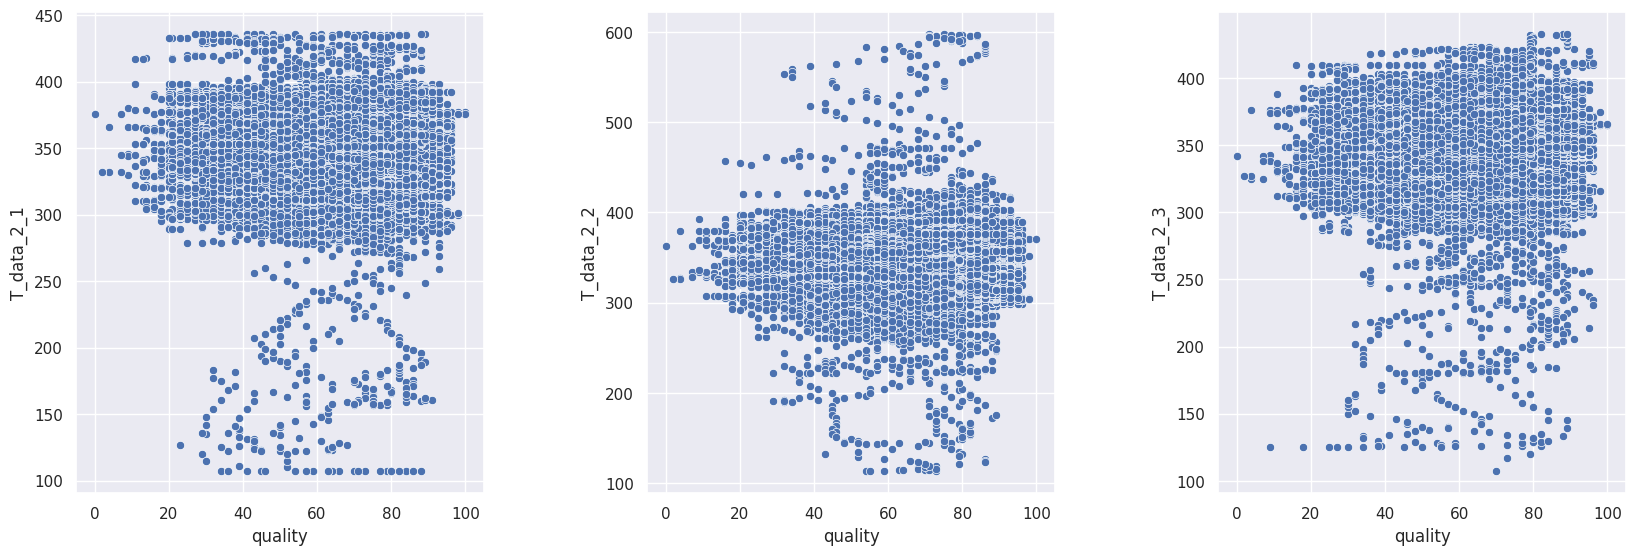

In [35]:
# quality vs temp in 2nd chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_2_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_2_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_2_3")
   


#### Findings: Second Chamber Temperature Influence on Quality
* Analysis suggests that temperatures within the 300 to 400 interval positively correlate with enhanced bean quality.
* The temperature recorded in the second chamber predominantly falls within the range of 250 to 400.

<Axes: xlabel='quality', ylabel='T_data_3_3'>

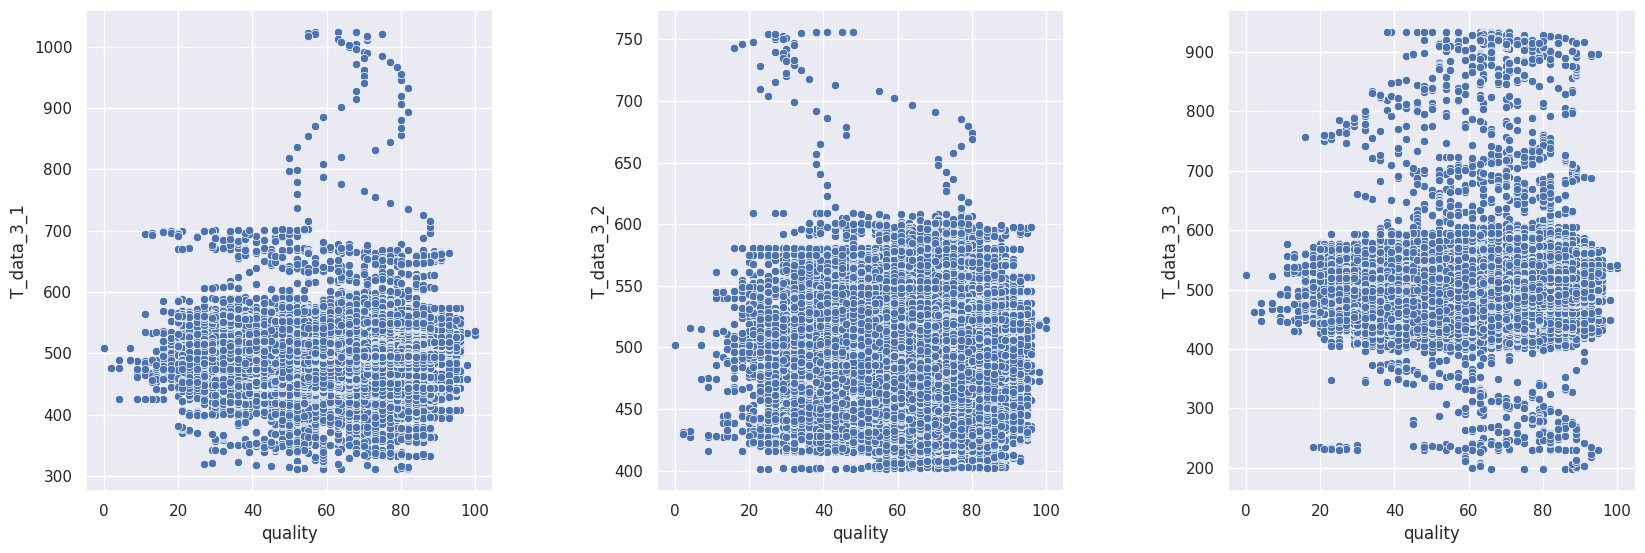

In [36]:
# quality vs temp in 3rd chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_3_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_3_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_3_3")
   


#### Observations on Third Chamber Temperature and Quality
* The temperature within the third chamber (`T_data_3_x`) does not appear to have a significant or severe effect on the quality outcome.
* Temperatures in the third chamber are typically found to be between approximately 400 and 600.

<Axes: xlabel='quality', ylabel='T_data_4_3'>

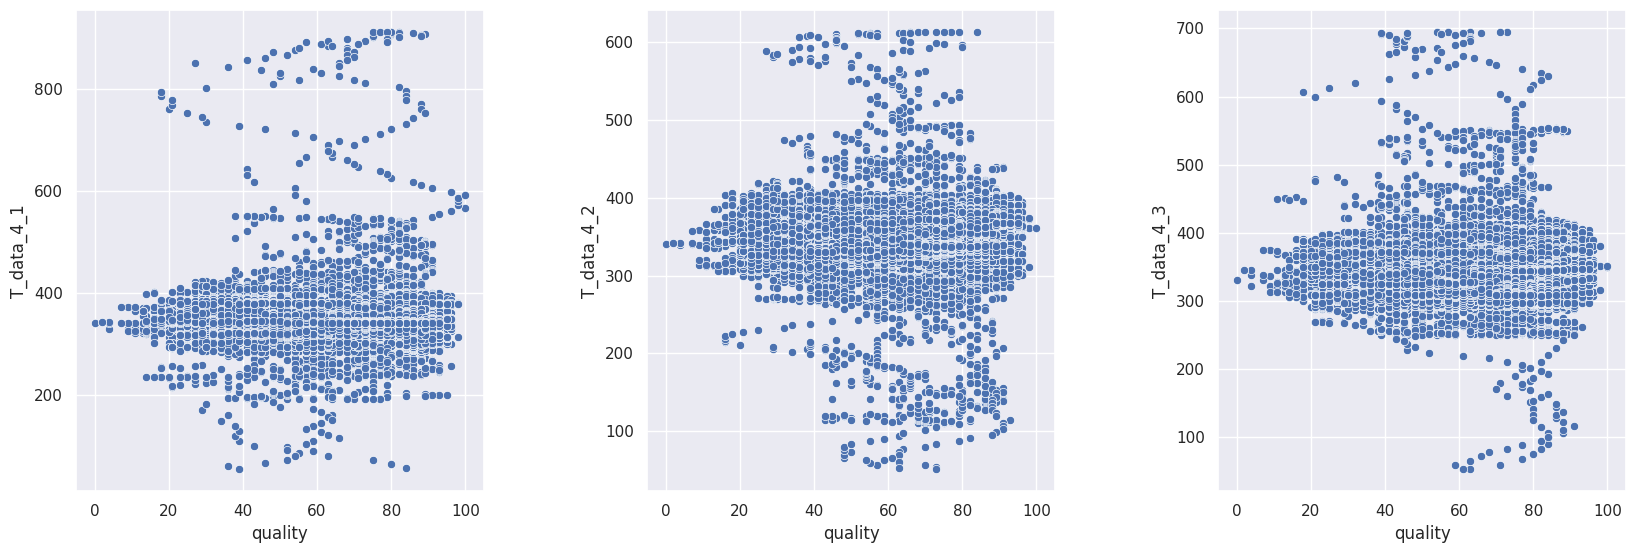

In [37]:
# quality vs temp in 4th chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_4_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_4_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_4_3")
   


#### Observations on Fourth Chamber Temperature and Quality
* The temperature in the fourth chamber (`T_data_4_x`) typically falls within the range of 200 to 450.
* Observations where the temperature is within this 200-450 range are associated with better quality.

<Axes: xlabel='quality', ylabel='T_data_5_3'>

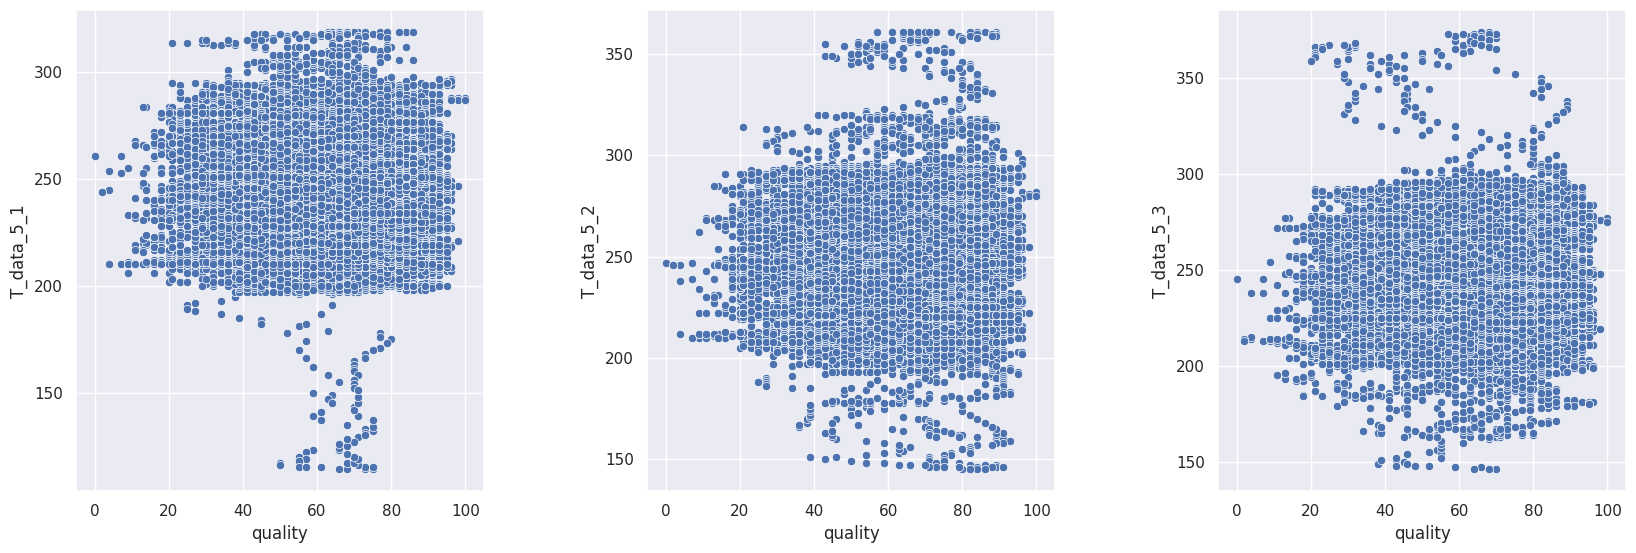

In [38]:
# quality vs temp in 5th chamber

fig = plt.figure(figsize = (20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_5_1")

ax = fig.add_subplot(2, 3, 2)
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_5_2")

ax = fig.add_subplot(2, 3, 3) 
sns.scatterplot(data=kc_roasters_data_copy, x="quality", y="T_data_5_3")
   


#### Observations on Fifth Chamber Temperature and Quality
* The temperature within the fifth chamber (`T_data_5_x`) does not appear to have a significant or severe effect on the quality outcome.
* Temperatures in the fifth chamber are typically found to be between approximately 200 and 300.

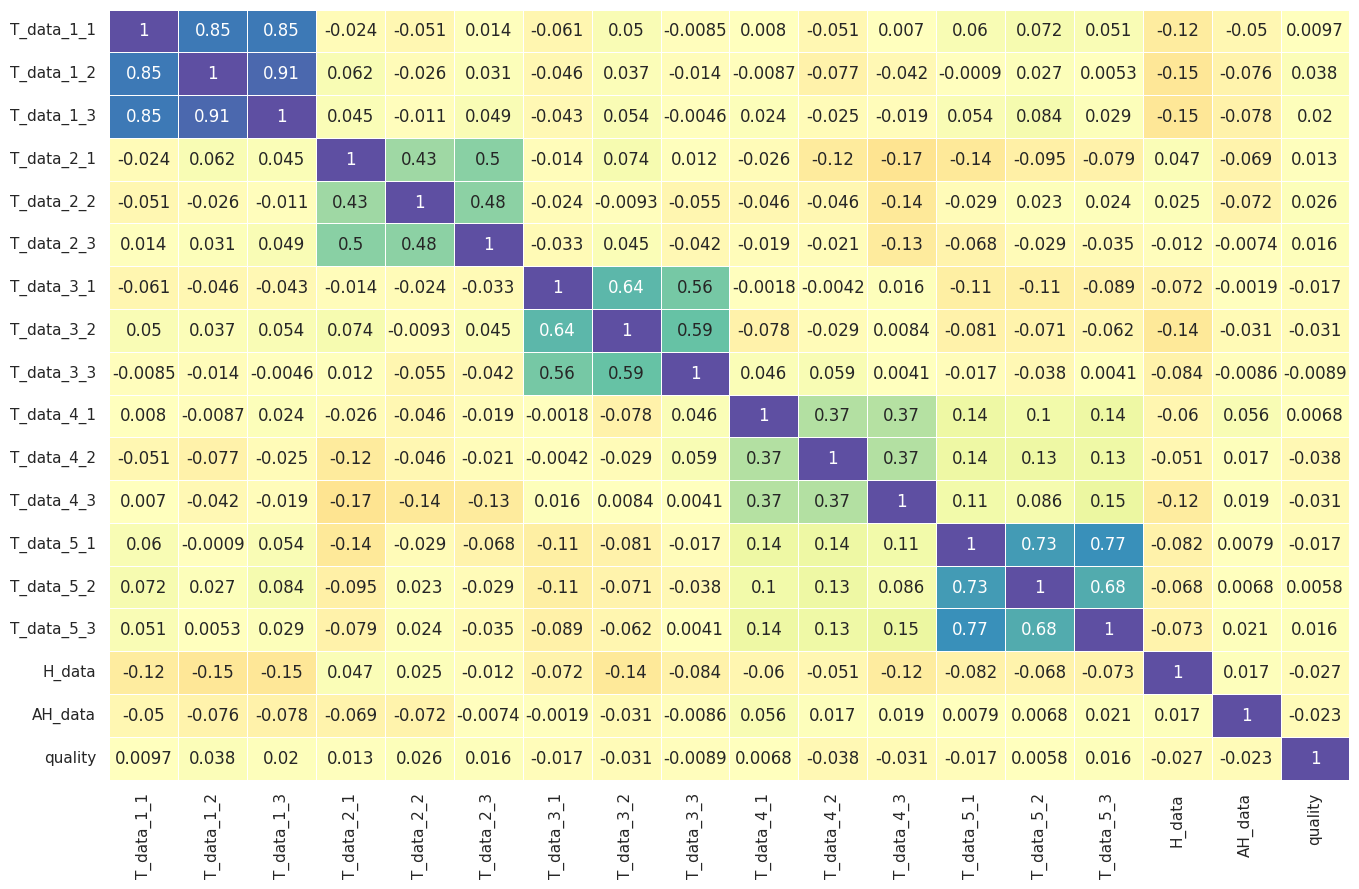

In [39]:
# Correlation matrix

sns.set(rc={"figure.figsize": (16, 10)})
sns.heatmap(
    kc_roasters_data_copy.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="Spectral"
)
plt.show()

* Temperatures recorded by different sensors within the same chamber are correlated.

## Data Pre-Processing

### Data Preparation for bg_tuned_modeling

In [40]:
# Creating the copy of the org data
kc_roasters_data_copy1 = kc_roasters_data_copy.copy()

In [41]:
# Dividing train data into X and y 

X = kc_roasters_data_copy1.drop(["quality"], axis=1)
y = kc_roasters_data_copy1["quality"]

In [42]:
# Splitting data into training and validation set:

X_train_data, X_temp, y_train_data, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)

X_test_data, X_val_data, y_test, y_val_data = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=1
)

print(X_train_data.shape, X_val_data.shape, X_test_data.shape)

(17478, 17) (5827, 17) (5826, 17)


### Missing value imputation

#### Handling Missing Values
* Missing values were identified in the `AH_data` and `H_data` variables.
* We will impute these missing values using the median of the respective columns.
* To prevent data leakage, the imputation will be performed separately on the training and validation sets *after* the data split.

In [43]:
imputer = SimpleImputer(strategy="median")

In [44]:
# Fit and transform the train data
X_train_data = pd.DataFrame(imputer.fit_transform(X_train_data), columns=X_train_data.columns)

# Transform the validation data
X_val_data = pd.DataFrame(imputer.transform(X_val_data), columns=X_train_data.columns)

# Transform the test data
X_test_data = pd.DataFrame(imputer.transform(X_test_data), columns=X_train_data.columns)

In [45]:
# Checking that no column has missing values in train or test sets
print(X_train_data.isna().sum())
print("-" * 30)
print(X_val_data.isna().sum())
print("-" * 30)
print(X_test_data.isna().sum())

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64


* All missing values in the specified columns (`AH_data`, `H_data`) have now been imputed.

## bg_tuned_model Building

**Let's create a function to calculate different metrics, so that we don't have to use the same code repeatedly for each model.**

In [46]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

### Decision Tree

In [47]:
dtree_model= DecisionTreeRegressor(random_state=1)
dtree_model.fit(X_train_data, y_train_data)

DecisionTreeRegressor(random_state=1)

In [48]:
dtree_train_model_performance = model_performance_regression(dtree_model, X_train_data, y_train_data)
dtree_train_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,0.000,0.000,1.000,1.000


In [49]:
dtree_val_model_performance = model_performance_regression(dtree_model, X_val_data, y_val_data)
dtree_val_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,7.438,5.202,0.789,0.789


* The decision tree model is overfitting the data. 

### Random Forest

In [50]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train_data, y_train_data)

RandomForestRegressor(random_state=1)

In [51]:
rf_train_model_performance = model_performance_regression(
    rf_model, X_train_data, y_train_data
)
rf_train_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,2.022,1.502,0.985,0.985


In [52]:
rf_val_model_performance = model_performance_regression(rf_model, X_val_data, y_val_data)
rf_val_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,5.307,4.004,0.893,0.893


* The Random Forest model shows slight overfitting.

### Bagging Regressor

In [53]:
bag_model = BaggingRegressor(random_state=1)
bag_model.fit(X_train_data, y_train_data)

BaggingRegressor(random_state=1)

In [54]:
bag_train_model_performance = model_performance_regression(
    bag_model, X_train_data, y_train_data
)
bag_train_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,2.632,1.815,0.975,0.975


In [55]:
bag_val_model_performance = model_performance_regression(bag_model, X_val_data, y_val_data)
bag_val_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,5.916,4.408,0.867,0.866


#### Bagging Regressor Performance
* The Bagging Regressor model demonstrates low RMSE values on both the training and validation datasets, indicating good performance and effective generalization to unseen data.

### Adaboost

In [56]:
ab_model = AdaBoostRegressor(random_state=1)
ab_model.fit(X_train_data, y_train_data)

AdaBoostRegressor(random_state=1)

In [57]:
ab_train_model_performance = model_performance_regression(
    ab_model, X_train_data, y_train_data
)
ab_train_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,16.514,13.754,-0.001,-0.002


In [58]:
ab_val_model_performance = model_performance_regression(ab_model, X_val_data, y_val_data)
ab_val_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,16.260,13.530,-0.006,-0.009


* The AdaBoost model exhibits overfitting and does not generalize well to unseen data (validation dataset).

### Gradient Boosting

In [59]:
gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(X_train_data, y_train_data)

GradientBoostingRegressor(random_state=1)

In [60]:
gb_train_model_performance = model_performance_regression(
    gb_model, X_train_data, y_train_data
)
gb_train_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,15.020,12.236,0.172,0.171


In [61]:
gb_val_model_performance = model_performance_regression(gb_model, X_val_data, y_val_data)
gb_val_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,14.873,12.134,0.158,0.156


* The Gradient Boosting model shows high RMSE values on both the training and validation datasets.

### Xgboost

In [62]:
xgb_model = XGBRegressor(random_state=1)
xgb_model.fit(X_train_data, y_train_data)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [63]:
xgb_train_model_performance = model_performance_regression(
    xgb_model, X_train_data, y_train_data
)
xgb_train_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,7.652,5.980,0.785,0.785


In [64]:
xgb_val_model_performance = model_performance_regression(xgb_model, X_val_data, y_val_data)
xgb_val_model_performance

,RMSE,MAE,R-squared,Adj. R-squared
0,9.028,7.091,0.690,0.689


* The XGBoost model shows high RMSE values on both the training and validation datasets.

## bg_tuned_model performance comparison

In [65]:
# Training performance comparison

models_train_comp_kc = pd.concat(
    [
        dtree_train_model_performance.T,
        rf_train_model_performance.T,
        bag_train_model_performance.T,
        ab_train_model_performance.T,
        gb_train_model_performance.T,
        xgb_train_model_performance.T,
    ],
    axis=1,
)
models_train_comp_kc.columns = [
    "Decision tree",
    "Random forest",
    "Bagging Regressor",
    "Adaboost",
    "Gradient Boosting",
    "Xgboost",
]
print("Training performance comparison:")
models_train_comp_kc.T

Training performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Decision tree,0.000,0.000,1.000,1.000
Random forest,2.022,1.502,0.985,0.985
Bagging Regressor,2.632,1.815,0.975,0.975
Adaboost,16.514,13.754,-0.001,-0.002
Gradient Boosting,15.020,12.236,0.172,0.171
Xgboost,7.652,5.980,0.785,0.785


In [66]:
# Validation performance comparison

models_val_comp_kc = pd.concat(
    [
        dtree_val_model_performance.T,
        rf_val_model_performance.T,
        bag_val_model_performance.T,
        ab_val_model_performance.T,
        gb_val_model_performance.T,
        xgb_val_model_performance.T,
    ],
    axis=1,
)
models_val_comp_kc.columns = [
    "Decision tree",
    "Random forest",
    "Bagging Regressor",
    "Adaboost",
    "Gradient Boosting",
    "Xgboost",
]
print("Validation performance comparison:")
models_val_comp_kc.T

Validation performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Decision tree,7.438,5.202,0.789,0.789
Random forest,5.307,4.004,0.893,0.893
Bagging Regressor,5.916,4.408,0.867,0.866
Adaboost,16.260,13.530,-0.006,-0.009
Gradient Boosting,14.873,12.134,0.158,0.156
Xgboost,9.028,7.091,0.690,0.689


#### Selecting bg_tuned_models for Hyperparameter Tuning
Based on the initial performance evaluation across all models, we observe promising results (low RMSE and favorable Adjusted R-squared values) from the following:

* Random Forest
* Bagging Regressor
* Decision Tree

Therefore, we will proceed to hyperparameter tune these three models in an effort to further enhance their performance.

## Hyperparameter Tuning

### Tuning Random Forest Regressor model

In [67]:
%%time 

rf_tuned_model = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(rf_tuned_model, parameters, scoring=scorer, n_iter=40, n_jobs = -1, cv=5, random_state=1)
randomized_cv = randomized_cv.fit(X_train_data, y_train_data)

# Set the clf to the best combination of parameters
rf_tuned_model = randomized_cv.best_estimator_

# Fit the best algorithm to the data
rf_tuned_model.fit(X_train_data, y_train_data)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'max_features': 'log2', 'max_depth': None} with CV score=0.8740151805774847:
CPU times: user 17.2 s, sys: 727 ms, total: 18 s
Wall time: 6min 37s


In [68]:
# Creating new pipeline with best parameters
rf_tuned_model = RandomForestRegressor(
    random_state=1, max_depth=None, max_features="log2", n_estimators=110
)

rf_tuned_model.fit(X_train_data, y_train_data)

RandomForestRegressor(max_features='log2', n_estimators=110, random_state=1)

In [69]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned_model, X_train_data, y_train_data)
rf_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.915,1.421,0.987,0.987


In [70]:
rf_tuned_model_val_perf = model_performance_regression(rf_tuned_model, X_val_data, y_val_data)
rf_tuned_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,4.992,3.767,0.905,0.905


* Hyperparameter tuning successfully improved the performance of the Random Forest model.

### Tuning Bagging Regressor model

In [71]:
%%time 

# Defining the model
bg_tuned_model = BaggingRegressor(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [50, 100, 120, 150],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=bg_tuned_model, param_distributions=param_grid, n_iter=20, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_data,y_train_data)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 120, 'max_samples': 0.9, 'max_features': 0.7} with CV score=0.8602137771073354:
CPU times: user 20.5 s, sys: 560 ms, total: 21.1 s
Wall time: 7min 5s


In [72]:
# Creating new pipeline with best parameters
bag_tuned = BaggingRegressor(
    random_state=1, max_samples=0.7, max_features=0.9, n_estimators=120
)

bag_tuned.fit(X_train_data, y_train_data)

BaggingRegressor(max_features=0.9, max_samples=0.7, n_estimators=120,
                 random_state=1)

In [73]:
bag_tuned_train_perf = model_performance_regression(bag_tuned, X_train_data, y_train_data)
bag_tuned_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,2.944,2.229,0.968,0.968


In [74]:
bag_tuned_val_perf = model_performance_regression(bag_tuned, X_val_data, y_val_data)
bag_tuned_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,5.763,4.397,0.874,0.873


* Although the Bagging Regressor model now exhibits slight overfitting on the training data, its overall performance (e.g., on the validation set) has improved after tuning.

### Tuning Decision Tree Regressor model

In [75]:
%%time 

# Choose the type of classifier
dtree_tuned_model = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(15,20)) + [None], 
              'min_samples_leaf': [1, 3] + [None],
              'max_leaf_nodes' : [5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(dtree_tuned_model, parameters, scoring=scorer,cv=5, n_jobs = -1, verbose = 2, n_iter = 100)
randomized_cv = randomized_cv.fit(X_train_data, y_train_data)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=None, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=3; total time=   0.1s
[CV] END max_depth=None, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=3; total time=   0.1s
[CV] END max_depth=None, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=3; total time=   0.1s
[CV] END max_depth=None, max_leaf_nodes=10, min_impurity_decrease=0.001, min_samples_leaf=3; total time=   0.1s
[CV] END max_depth=17, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=None; total time=   0.0s
[CV] END max_depth=17, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=None; total time=   0.0s
[CV] END max_depth=17, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=None; total time=   0.0s
[CV] END max_depth=17, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=None; total time=   0.0s
[CV] END max_depth=17, max_leaf_nodes

In [76]:
dtree_tuned_model = DecisionTreeRegressor(
    random_state=1,
    max_depth=None,
    min_samples_leaf=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.001,
)

dtree_tuned_model.fit(X_train_data, y_train_data)

DecisionTreeRegressor(min_impurity_decrease=0.001, random_state=1)

In [77]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned_model, X_train_data, y_train_data)
dtree_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.519,1.126,0.992,0.992


In [78]:
dtree_tuned_model_val_perf = model_performance_regression(dtree_tuned_model, X_val_data, y_val_data)
dtree_tuned_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,7.633,5.387,0.778,0.778


* The Decision Tree model exhibits overfitting and does not generalize well to unseen data (validation dataset).

## bg_tuned_model performance comparison and choosing the final model

In [79]:
# Training performance comparison

models_train_comp_kc = pd.concat(
    [
        dtree_tuned_model_train_perf.T,
        bag_tuned_train_perf.T,
        rf_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_kc.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging regressor",
    "Tuned Random forest",
]
print("Training performance comparison:")
models_train_comp_kc.T

Training performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Tuned Decision Tree,1.519,1.126,0.992,0.992
Tuned Bagging regressor,2.944,2.229,0.968,0.968
Tuned Random forest,1.915,1.421,0.987,0.987


In [80]:
# Validation performance comparison

models_val_comp_kc = pd.concat(
    [
        dtree_tuned_model_val_perf.T,
        bag_tuned_val_perf.T,
        rf_tuned_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_kc.columns = [
    "Tuned Decision Tree",
    "Tuned Bagging regressor",
    "Tuned Random forest",
]
print("Validation performance comparison:")
models_val_comp_kc.T

Validation performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Tuned Decision Tree,7.633,5.387,0.778,0.778
Tuned Bagging regressor,5.763,4.397,0.874,0.873
Tuned Random forest,4.992,3.767,0.905,0.905


#### Conclusion and Final bg_tuned_model Choice
Upon reviewing the performance of all models, the Tuned Random Forest stands out with consistently low RMSE and high Adjusted R-squared values across both the train and validation sets. Therefore, we will proceed with the Random Forest model, utilizing the oversampled data, as our final chosen model.

**Now we have our final model, let's find out how our model is performing on unseen test data**

In [81]:
# Let's check the performance on test set
rf_test = model_performance_regression(rf_tuned_model, X_test_data, y_test)
rf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,4.980,3.753,0.906,0.906


#### Feature Importance for Random Forest Regressor
Let's investigate which features the tuned Random Forest model considered most important for making predictions.

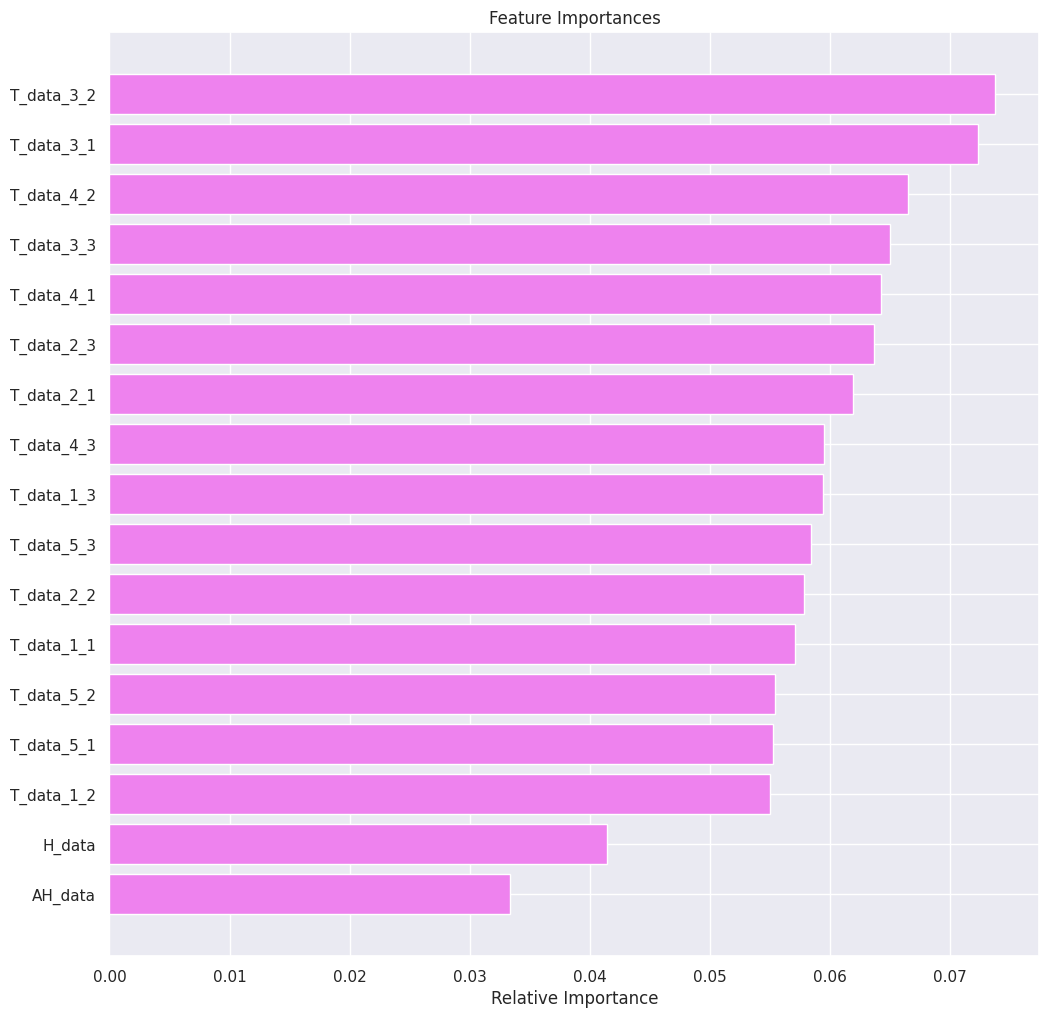

In [82]:
feature_names = X_train_data.columns
importances = rf_tuned_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Based on the Random Forest model's feature importance scores, `T_Data_3_2` emerged as the most influential feature, with `T_Data_3_1` and `T_Data_4_2` being the next most important.

## Let's use Pipelines to build the final model

In [83]:
bg_tuned_model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "Random forest",
            RandomForestRegressor(
                random_state=1, max_depth=None, max_features="log2", n_estimators=110
            ),
        ),
    ]
)

In [84]:
# Separating the target variable and other variables
X = kc_roasters_data_copy.drop(columns="quality")
Y = kc_roasters_data_copy["quality"]

In [85]:
# Splitting data into training and test set:

X_train_data, X_test_data, y_train_data, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print(X_train_data.shape, X_test_data.shape)

(20391, 17) (8740, 17)


In [86]:
bg_tuned_model.fit(X_train_data, y_train_data)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Random forest',
                 RandomForestRegressor(max_features='log2', n_estimators=110,
                                       random_state=1))])

In [87]:
# Let's check the performance on test set
Pipeline_model_test = model_performance_regression(bg_tuned_model, X_test_data, y_test)
Pipeline_model_test

,RMSE,MAE,R-squared,Adj. R-squared
0,4.475,3.388,0.924,0.924


## Business Insights and Conclusions

## Conclusions and Future Applications

Based on the analysis and model development:

* **Best Performing bg_tuned_model:** The Hyperparameter Tuned Random Forest Regressor provided the most favorable results, achieving a strong 90% R-squared score and a low Mean Absolute Error (MAE) of 3.7 on the validation data. This performance suggests the model is well-suited for making future quality predictions.

* **Key Influencing Factors:** Feature importance analysis revealed that `T_Data_3_2`, `T_Data_3_1`, and `T_Data_4_2` are the most significant predictors of quality. This finding underscores the critical role of temperature, particularly within the third and fourth chambers, in determining the final quality of the coffee beans.

* **Potential for Pricing Strategy:** The quality ratings predicted by the model can be integrated with business-defined quality tiers. This allows for the grouping of predicted quality levels to inform a more precise and automated pricing strategy for different batches of coffee beans.

* **Automation of Quality Inspection:** The developed model offers the capability to automate the material quality inspection process during manufacturing. By providing human-level or potentially better accuracy while significantly reducing the need for manual checks, this model can enhance efficiency and consistency in production.

These findings and the predictive model provide valuable insights into the factors affecting coffee bean quality and offer practical avenues for process optimization and automation.